Clasificador de Regresión Logística

1. Introducción a la Regresión Logística

La Regresión Logística es un modelo de clasificación supervisado que se utiliza cuando la variable objetivo es categórica por ejemplo: 0 o 1.

- Es útil para problemas de clasificación binaria.
- Estima la probabilidad de que una observación pertenezca a una clase.
- Usa una función sigmoide para producir un valor entre 0 y 1.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris


- `pandas`: para trabajar con estructuras tipo tabla (DataFrame), muy útiles para manejar datos.
- `matplotlib.pyplot` y `seaborn`: para graficar de forma sencilla y visualmente atractiva.
- `load_iris`: función de `sklearn.datasets` que nos da acceso directo al dataset Iris.

In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


Aquí se carga el dataset Iris y se convierte en un DataFrame de `pandas`.

- `iris.data` contiene las características de las flores.
- `iris.feature_names` son los nombres de esas características.
- `iris.target` contiene la clase de cada flor (0, 1 o 2).
- `df.head()` muestra las primeras 5 filas del DataFrame.


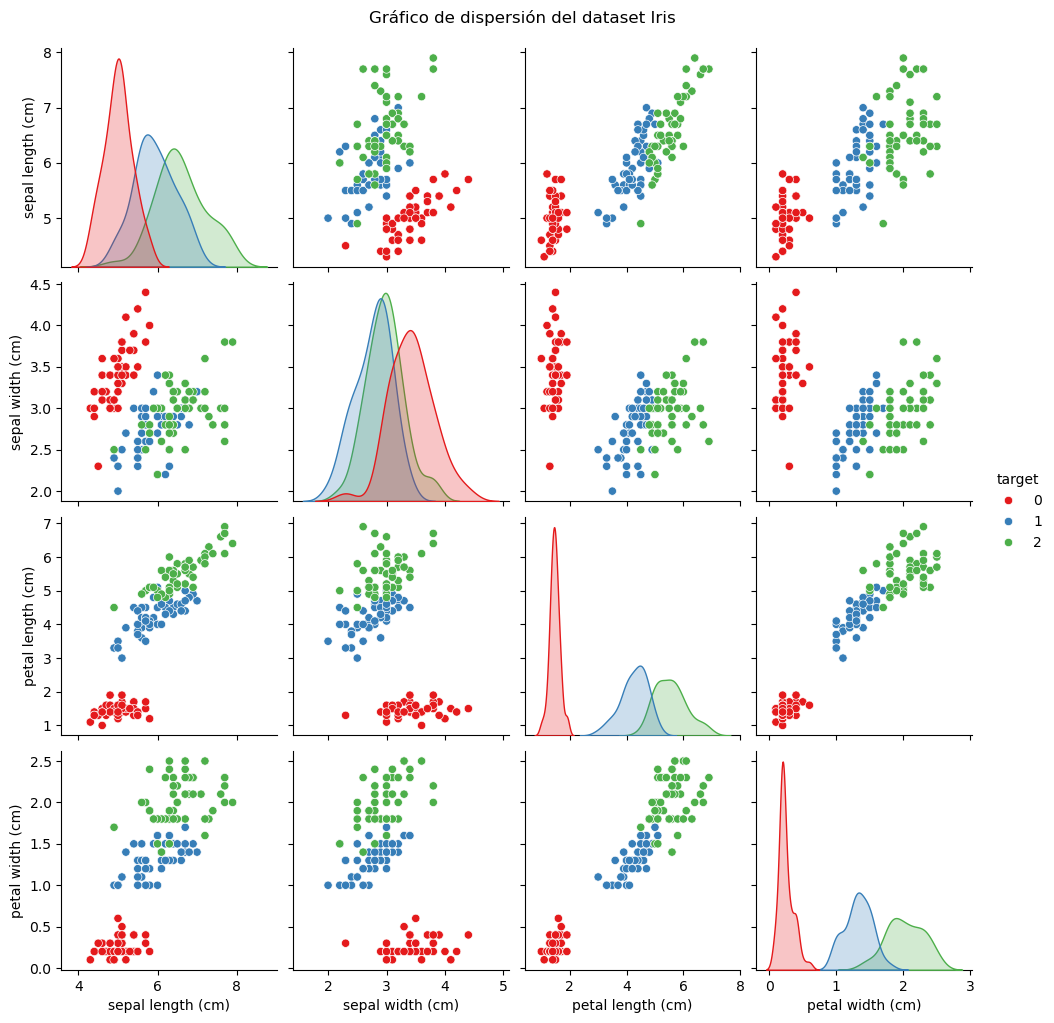

In [4]:
sns.pairplot(df, hue="target", palette="Set1")
plt.suptitle("Gráfico de dispersión del dataset Iris", y=1.02)
plt.show()


Usamos `pairplot` de `seaborn` para visualizar la relación entre todas las variables del dataset.

- El argumento `hue="target"` colorea los puntos según la clase.
- `palette="Set1"` elige una paleta de colores para que las clases se vean bien diferenciadas.
- `plt.suptitle()` agrega un título general al gráfico.



Utilizaremos el dataset Iris, que viene incluido en la librería `scikit-learn`.

- Contiene datos de flores con 4 características:
  - Largo y ancho del sépalo
  - Largo y ancho del pétalo
- La variable `target` representa la clase (tipo de flor):
  - 0 = setosa
  - 1 = versicolor
  - 2 = virginica

A continuación se muestra una parte del dataset y un gráfico de dispersión para visualizar la separación entre clases.


In [5]:
df_binario = df[df['target'] != 2]
X = df_binario.drop('target', axis=1)
y = df_binario['target']


Como la regresión logística binaria solo puede predecir entre dos clases, filtramos el dataset para quedarnos con las clases 0 y 1.

- `df[df['target'] != 2]` elimina la clase 2.
- `X` contiene las variables independientes.
- `y` contiene las etiquetas (clase 0 o 1).


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Dividimos los datos en dos partes:

- `X_train`, `y_train`: 70% de los datos para entrenar el modelo.
- `X_test`, `y_test`: 30% de los datos para probar su rendimiento.
- `random_state=42` se usa para que la división sea siempre igual (reproducible).


In [7]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

LogisticRegression()

Aquí usamos el modelo `LogisticRegression` de `scikit-learn`:

- `modelo.fit(X_train, y_train)` entrena el modelo con los datos de entrenamiento.
- Internamente, ajusta los coeficientes para minimizar la función de pérdida (log-loss).


In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Realizar predicciones
y_pred = modelo.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo: {:.2f}".format(accuracy))
print("El modelo clasificó correctamente el {:.0f}% de las flores.\n".format(accuracy * 100))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("  Matriz de Confusión:")
print("  Predijo Setosa correctamente:", cm[0][0])
print("  Predijo Versicolor correctamente:", cm[1][1])
print("  Errores al predecir Setosa como Versicolor:", cm[0][1])
print("  Errores al predecir Versicolor como Setosa:", cm[1][0])
print()

# Reporte
report = classification_report(y_test, y_pred, output_dict=True)

print("Desempeño por clase:")

for clase in ['0', '1']:
    nombre = "Setosa" if clase == '0' else "Versicolor"
    p = report[clase]['precision']
    r = report[clase]['recall']
    f1 = report[clase]['f1-score']
    soporte = report[clase]['support']
    
    print(f" {nombre}:")
    print(f" Precisión: {p:.2f} — Predijo {nombre} correctamente cuando debía")
    print(f" Sensibilidad (Recall): {r:.2f} — Detectó todas las verdaderas {nombre}")
    print(f" F1-score: {f1:.2f} — Equilibrio entre precisión y recall")
    print(f" Apareció {soporte} veces en los datos\n")

# Resumen
print("Resumen general:")
print(" Promedio de precisión:", round(report['macro avg']['precision'], 2))
print(" Promedio de recall:", round(report['macro avg']['recall'], 2))
print(" Promedio F1-score:", round(report['macro avg']['f1-score'], 2))


Exactitud del modelo: 1.00
El modelo clasificó correctamente el 100% de las flores.

  Matriz de Confusión:
  Predijo Setosa correctamente: 17
  Predijo Versicolor correctamente: 13
  Errores al predecir Setosa como Versicolor: 0
  Errores al predecir Versicolor como Setosa: 0

Desempeño por clase:
 Setosa:
 Precisión: 1.00 — Predijo Setosa correctamente cuando debía
 Sensibilidad (Recall): 1.00 — Detectó todas las verdaderas Setosa
 F1-score: 1.00 — Equilibrio entre precisión y recall
 Apareció 17.0 veces en los datos

 Versicolor:
 Precisión: 1.00 — Predijo Versicolor correctamente cuando debía
 Sensibilidad (Recall): 1.00 — Detectó todas las verdaderas Versicolor
 F1-score: 1.00 — Equilibrio entre precisión y recall
 Apareció 13.0 veces en los datos

Resumen general:
 Promedio de precisión: 1.0
 Promedio de recall: 1.0
 Promedio F1-score: 1.0


Evaluamos el rendimiento del modelo con tres métricas importantes:

- `accuracy_score`: mide el porcentaje de predicciones correctas sobre el total.
- `confusion_matrix`: muestra cuántas veces el modelo acertó o se equivocó por clase.
- `classification_report`: incluye varias métricas:
  - **precision**: de los que predijo como positivos, ¿cuántos realmente lo eran?
  - **recall**: de los positivos reales, ¿cuántos detectó?
  - **f1-score**: equilibrio entre precision y recall.

Esto nos da una visión completa del rendimiento del modelo.
